## **Explainable AI**
****

Explainable AI encourages transparency in model building, evaluation and implementation. It is also known as interpretable AI and it deems important the ablity of an artificial intelligence model to provide understandable explanations for its decisions of predictions. This is important for industries such as financial institutions and healthcare companies due to some reasons such as:

- Regulatory Compliance
- Trust and Risk Assessment
- Bias Detection and Mitigation
- Model Validation and Auditing
- Error Diagnosis and Resolution
- Human-AI Collaboration

In this project, I'll be using two models, XGBoost and Rondom Forest. This models would be used to predict loan defaults taking into perspective - accuracy and confidence.

For Interpretability, model evaluation tools such as SHAP(SHapley Additive exPlanations), Alibi, and Counterfactuals would help to unravel the intricate threads of AI decision-making, ringing clarity and insight to the prediction process.

## **Importing Packages**

In [ ]:
!pip install -U graphviz scikit-learn neptune-xgboost xgboost hyperopt mlflow deepchecks
!pip install -U "neptune[xgboost]"

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/5d/55/0403bf2031250ac982c8053397889fbc5a3a2b3798b913dae4f51c3af6a4/scikit_learn-1.5.1-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.5.1-cp311-cp311-win_amd64.whl.metadata (12 kB)


In [ ]:
import pandas as pd
import numpy as np
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Create a function that reads the dataset
def read_excel_data(file_path, sheet_names):
    data_frames = []

    # Read each sheet from the Excel file and store it in a list of DataFrames
    for sheet_name in sheet_names:
        data_frame = pd.read_excel(file_path, sheet_name=sheet_name, engine='openpyxl')
        data_frames.append(data_frame)

    return data_frames


In [ ]:
# Specify the file path of the Excel file containing the dataset
path = 'C:/Users/Acer1/lab_pyspark_1/loan_prediction/Credit_Risk_Dataset.xlsx'

# Call the function to read the Excel data
sheet_names= ['loan_information', 'Employment','Personal_information', 'Other_information']

dfs = read_excel_data(path, sheet_names)

loan_information = dfs[0]
employment = dfs[1]
personal_information = dfs[2]
other_information = dfs[3]

In [ ]:
employment

,User id,Employmet type,Tier of Employment,Industry,Role,Work Experience,Total Income(PA)
0,7013527,Salaried,B,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGAZSEWdkcndwkcnCCM,1-2,125000.0
1,7014291,Self - Employeed,D,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNCSEWdkcndwkcnCCM,10+,61000.0
2,7014327,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNYSEWdkcndwkcnCCM,5-10,100000.0
3,7014304,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,2-3,30000.0
4,7031995,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,10+,65000.0
...,...,...,...,...,...,...,...
134412,55993166,NaN,NaN,0,KHMbckjadbckIFGTNSEWdkcndwkcnCCM,0,100000.0
134413,56263229,NaN,NaN,0,KHMbckjadbckIFGOHSEWdkcndwkcnCCM,0,27000.0
134414,55992716,NaN,NaN,0,KHMbckjadbckIFGCASEWdkcndwkcnCCM,0,53000.0
134415,56363313,NaN,NaN,0,KHMbckjadbckIFGVASEWdkcndwkcnCCM,0,75400.0


In [ ]:
# Merge 'loan_information' and 'Employment' dataframes based on 'User_id'
merged_df = pd.merge(loan_information, employment, left_on='User_id', right_on='User id')

# Merge the previously merged dataframe with 'personal_information' based on 'User_id'
merged_df = pd.merge(merged_df, personal_information, left_on='User_id', right_on='User id')

# Merge the previously merged dataframe with 'other_information' based on 'User_id'
merged_df = pd.merge(merged_df, other_information, left_on='User_id', right_on='User_id')

df=merged_df
# Display the first few rows of the merged dataframe
df.head()

,User_id,Loan Category,Amount,Interest Rate,Tenure(years),User id_x,Employmet type,Tier of Employment,Industry,Role,...,Home,Pincode,Social Profile,Is_verified,Delinq_2yrs,Total Payement,Received Principal,Interest Received,Number of loans,Defaulter
0,7013527,Consolidation,55884.0,11.84,6,7013527,Salaried,B,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGAZSEWdkcndwkcnCCM,...,rent,XX852X,No,NaN,0,1824.150000,971.46,852.69,0,1
1,7014291,Consolidation,55511.0,16.94,4,7014291,Self - Employeed,D,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNCSEWdkcndwkcnCCM,...,mortgage,XX286X,NaN,Source Verified,0,22912.532998,18000.00,4912.53,0,0
2,7014327,Consolidation,12289.0,11.84,6,7014327,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNYSEWdkcndwkcnCCM,...,own,XX113X,No,NaN,0,7800.440000,4489.76,3310.68,0,1
3,7014304,Credit Card,29324.0,14.71,4,7014304,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,...,rent,XX941X,Yes,NaN,0,6672.050000,5212.29,1459.76,0,0
4,7031995,Credit Card,30252.0,14.71,4,7031995,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,...,rent,XX913X,No,Verified,0,11793.001345,10000.00,1793.00,0,0


## **Exploratory Data Analysis**

This helps to understand and identify the data types of each column, Understand basic statistics of all numerical columns, check missing values and plan for handling missing values. It also helps to analyze the quality of data based on the distribution, identify any skewness i the data and investigate the reasons behind data skewness. Also , EDA helps to identify and handle categorical features, Examine the correlation between different numeric and categorical variables and finally fix imbalances in the dataset.

In [ ]:
# Display data types for each column in the Dataframe to see if there's any column with the wrong data type.
df.dtypes

User_id                 int64
Loan Category          object
Amount                float64
Interest Rate         float64
Tenure(years)           int64
User id_x               int64
Employmet type         object
Tier of Employment     object
Industry               object
Role                   object
Work Experience        object
Total Income(PA)      float64
User id_y               int64
Gender                 object
Married                object
Dependents              int64
Home                   object
Pincode                object
Social Profile         object
Is_verified            object
Delinq_2yrs             int64
Total Payement        float64
Received Principal    float64
Interest Received     float64
Number of loans         int64
Defaulter               int64
dtype: object

In [ ]:
# The describe method in pandas can help to learn basic statistics of all numerical columns in the dataset
df.describe()

,User_id,Amount,Interest Rate,Tenure(years),User id_x,Total Income(PA),User id_y,Dependents,Delinq_2yrs,Total Payement,Received Principal,Interest Received,Number of loans,Defaulter
count,1.437270e+05,1.118030e+05,143727.000000,143727.000000,1.437270e+05,1.437270e+05,1.437270e+05,143727.000000,143727.000000,143727.000000,143727.000000,143727.000000,143727.000000,143727.000000
mean,3.733474e+07,1.376458e+05,12.038703,4.514503,3.733474e+07,7.242256e+04,3.733474e+07,1.997113,0.276601,10840.882025,8407.001538,2352.729746,0.005573,0.093712
std,3.182811e+07,1.575427e+05,3.880204,0.874241,3.182811e+07,5.539328e+04,3.182811e+07,1.411317,0.789019,8613.421536,7224.396032,2447.759754,0.098785,0.291429
min,2.080360e+05,0.000000e+00,5.420000,4.000000,2.080360e+05,4.000000e+03,2.080360e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.276118e+06,2.837950e+04,9.180000,4.000000,3.276118e+06,4.500000e+04,3.276118e+06,1.000000,0.000000,4674.775000,3104.160000,841.685000,0.000000,0.000000
50%,5.766517e+07,7.660300e+04,11.840000,4.000000,5.766517e+07,6.180000e+04,5.766517e+07,2.000000,0.000000,8212.410000,6000.000000,1632.240000,0.000000,0.000000
75%,6.729174e+07,2.054645e+05,14.440000,6.000000,6.729174e+07,8.600000e+04,6.729174e+07,3.000000,0.000000,14175.769677,11664.365000,2904.770000,0.000000,0.000000
max,7.895894e+07,8.000078e+06,23.540000,6.000000,7.895894e+07,7.141778e+06,7.895894e+07,4.000000,22.000000,57777.579870,35000.010000,24205.620000,5.000000,1.000000


### **Handling Missing Values in the Data**

In [ ]:
df.isnull().sum()

User_id                   0
Loan Category             0
Amount                31924
Interest Rate             0
Tenure(years)             0
User id_x                 0
Employmet type        84642
Tier of Employment    84642
Industry                  4
Role                      0
Work Experience           4
Total Income(PA)          0
User id_y                 0
Gender                    0
Married               48143
Dependents                0
Home                      0
Pincode                   0
Social Profile        47856
Is_verified           35803
Delinq_2yrs               0
Total Payement            0
Received Principal        0
Interest Received         0
Number of loans           0
Defaulter                 0
dtype: int64

**Handling Missing Values**

- Social profile: Create a new category for NA values.
- Is verified: Create a new category for NA values.
- Married: Create a new category for NA values.
- Industry: Consider dropping missing values.
- Work experience: Consider dropping missing values.
- Amount: Evaluate the impact of removing rows with missing values on the data distribution.
- Employment type: Determine the appropriate approach for handling missing values.
- Tier of employment: Determine the appropriate approach for handling missing values.

In [ ]:
# Drop rows with missing values in the 'Industry' and 'Work Experience' columns as the data in 'Industry' is meaningless due to encryption, and 'Work Experience' is inconsistent in the dataset, treating it as an object datatype variable which may impact model performance.
df = df.dropna(subset=['Industry', 'Work Experience'])

In [ ]:
# Transform the data by replacing null values in specific columns with the string "missing" using the fillna() function.
def replace_null_values_with_a_value(df, columns,value):
    # Replace null values with "missing" in specific columns
    for column in columns:
        df[column] = df[column].fillna(value)
    return df

# Call the function to replace null values with "missing"
replace_with='missing'
columns_to_replace = ['Social Profile', 'Is_verified', 'Married', 'Employmet type']


df= replace_null_values_with_a_value(df, columns_to_replace, replace_with)

In [ ]:
#Create a new variable "amount_missing" to indicate if the 'Amount' is missing or not. Assign 1 if 'Amount' is null, otherwise assign 0.
df['amount_missing'] = np.where(df['Amount'].isnull(), 1, 0)

#Replace the null values in the 'Amount' column with the value "-1000" to differentiate them from the rest of the data.
replace_with= - 1000
columns_to_replace = ['Amount']

df= replace_null_values_with_a_value(df, columns_to_replace,replace_with)

In [ ]:
# Replace the null values in the 'Tier of Employment' column with the string "Z" to categorize them separately.
replace_with='Z'
columns_to_replace = ['Tier of Employment']

df= replace_null_values_with_a_value(df, columns_to_replace,replace_with)

In [ ]:
#Check for null rows in the DataFrame to confirm if the data is clean and does not contain any missing values that could potentially impact the performance of the model.
df.isnull().sum()

User_id               0
Loan Category         0
Amount                0
Interest Rate         0
Tenure(years)         0
User id_x             0
Employmet type        0
Tier of Employment    0
Industry              0
Role                  0
Work Experience       0
Total Income(PA)      0
User id_y             0
Gender                0
Married               0
Dependents            0
Home                  0
Pincode               0
Social Profile        0
Is_verified           0
Delinq_2yrs           0
Total Payement        0
Received Principal    0
Interest Received     0
Number of loans       0
Defaulter             0
amount_missing        0
dtype: int64

In [ ]:
def unique_values_each_column(df):
    # Print number of unique values in all columns
    for col in df.columns:
        print(col, ':', df[col].nunique())

# Call the function to print the number of unique values in all columns
unique_values_each_column(df)

User_id : 133748
Loan Category : 7
Amount : 86157
Interest Rate : 137
Tenure(years) : 2
User id_x : 133748
Employmet type : 3
Tier of Employment : 8
Industry : 12974
Role : 46
Work Experience : 7
Total Income(PA) : 11380
User id_y : 133748
Gender : 3
Married : 3
Dependents : 5
Home : 5
Pincode : 844
Social Profile : 3
Is_verified : 4
Delinq_2yrs : 22
Total Payement  : 104199
Received Principal : 42021
Interest Received : 93859
Number of loans : 5
Defaulter : 2
amount_missing : 2


It can be observed that some columns have nominal categorical variables while some have ordinal categorical variables excluding the columns with numerical variables. It is important to address the challenge of categorical columns with a large number of categories and develop a stratagy for handling them. If a column has too many categories say fifty categories, it may be better in some cases to drop such column as it might introduce complexities that the classification model will not be able to handle.

In [ ]:
# Dropping Industry Column and User_IDs as it doesn't give any significant information
# Drop 'Pincode' column: Considering privacy concerns, the 'Pincode' data is encrypted. To address these concerns, it is prudent to remove the 'Pincode' column from the dataset.
columns_to_drop = ['Industry', 'User_id','User id_x','User id_y','Pincode','Role']


#Function to drop columns
def drop_columns(df, columns_to_drop):
    for column in columns_to_drop:
      df.drop(column, axis=1, inplace=True)

    return df

# Call the function to drop columns
drop_columns(df, columns_to_drop)

,Loan Category,Amount,Interest Rate,Tenure(years),Employmet type,Tier of Employment,Work Experience,Total Income(PA),Gender,Married,...,Home,Social Profile,Is_verified,Delinq_2yrs,Total Payement,Received Principal,Interest Received,Number of loans,Defaulter,amount_missing
0,Consolidation,55884.0,11.84,6,Salaried,B,1-2,125000.0,Female,Yes,...,rent,No,missing,0,1824.150000,971.46,852.69,0,1,0
1,Consolidation,55511.0,16.94,4,Self - Employeed,D,10+,61000.0,Female,No,...,mortgage,missing,Source Verified,0,22912.532998,18000.00,4912.53,0,0,0
2,Consolidation,12289.0,11.84,6,missing,Z,5-10,100000.0,Other,missing,...,own,No,missing,0,7800.440000,4489.76,3310.68,0,1,0
3,Credit Card,29324.0,14.71,4,missing,Z,2-3,30000.0,Male,missing,...,rent,Yes,missing,0,6672.050000,5212.29,1459.76,0,0,0
4,Credit Card,30252.0,14.71,4,missing,Z,10+,65000.0,Male,missing,...,rent,No,Verified,0,11793.001345,10000.00,1793.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143722,Credit Card,287564.0,12.06,6,missing,Z,0,100000.0,Female,No,...,mortgage,missing,Source Verified,1,12842.400000,7193.83,5648.57,0,0,0
143723,Other,49612.0,14.10,4,missing,Z,0,27000.0,Male,Yes,...,rent,No,Source Verified,0,839.200000,581.67,257.53,0,0,0
143724,Consolidation,13632.0,18.96,6,missing,Z,0,53000.0,Female,Yes,...,rent,missing,missing,0,6085.800000,2434.49,3651.31,0,0,0
143725,Home,186923.0,8.28,4,missing,Z,0,75400.0,Other,No,...,mortgage,missing,Source Verified,0,4080.640000,3286.82,793.82,0,0,0


### **On Dropping Industry and Pincode**

- Drop 'Industry': As a nominal categorical variable, there exist the issue of the high number of categories to prevent the model's dimensionality from becoming too large. Since there is no effective way to group these categories into broader categories, it is recommended to drop this column for the time being.

- Convert 'Pincode' to spatial variables: Considering that 'Pincode' represents location data, it might be helpful to transform it into latitude and longitude variables. this conversion can provide more meaningful spatial information that can enhance the model's functionality.

### **Multicolinearity**

To assess the relationships between variables in the dataset, the spearman correlation matrix can provide informaation on how two variables are correlated. By translating the matrix into a heatmap, one can identify potential concerns related to multicollinearity, which happend when two or more independent variables exhibit high correlation. Multicollinearity can impact both the training and interpretation of the modell and cause problems like overfitting. It may be necessary to remove one of the correlated independent variables to avoid these issues.

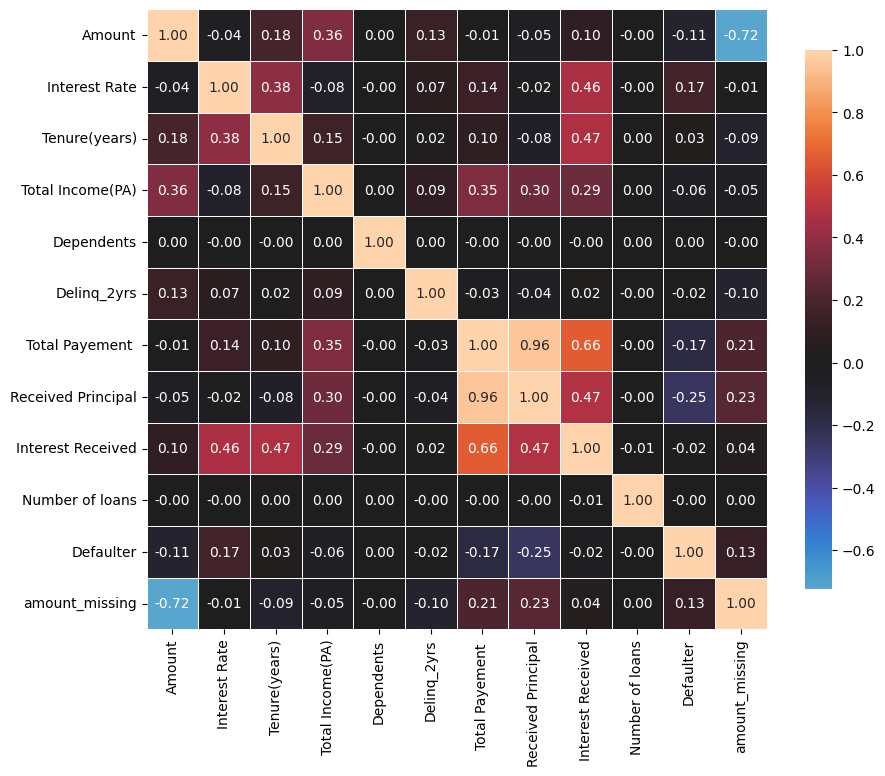

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Display pearson correlation matrix
def correlation_heatmap(train):
     # Select only numeric columns
    numeric_df = train.select_dtypes(include=[float, int])
    correlations = numeric_df.corr(method='spearman')


    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();


correlation_heatmap(df)

**Observation from the heatmap**

No two variables have high correlation with each other, so there is no issue of multicollinearity. It's safe to use all variables in machine learning model building.

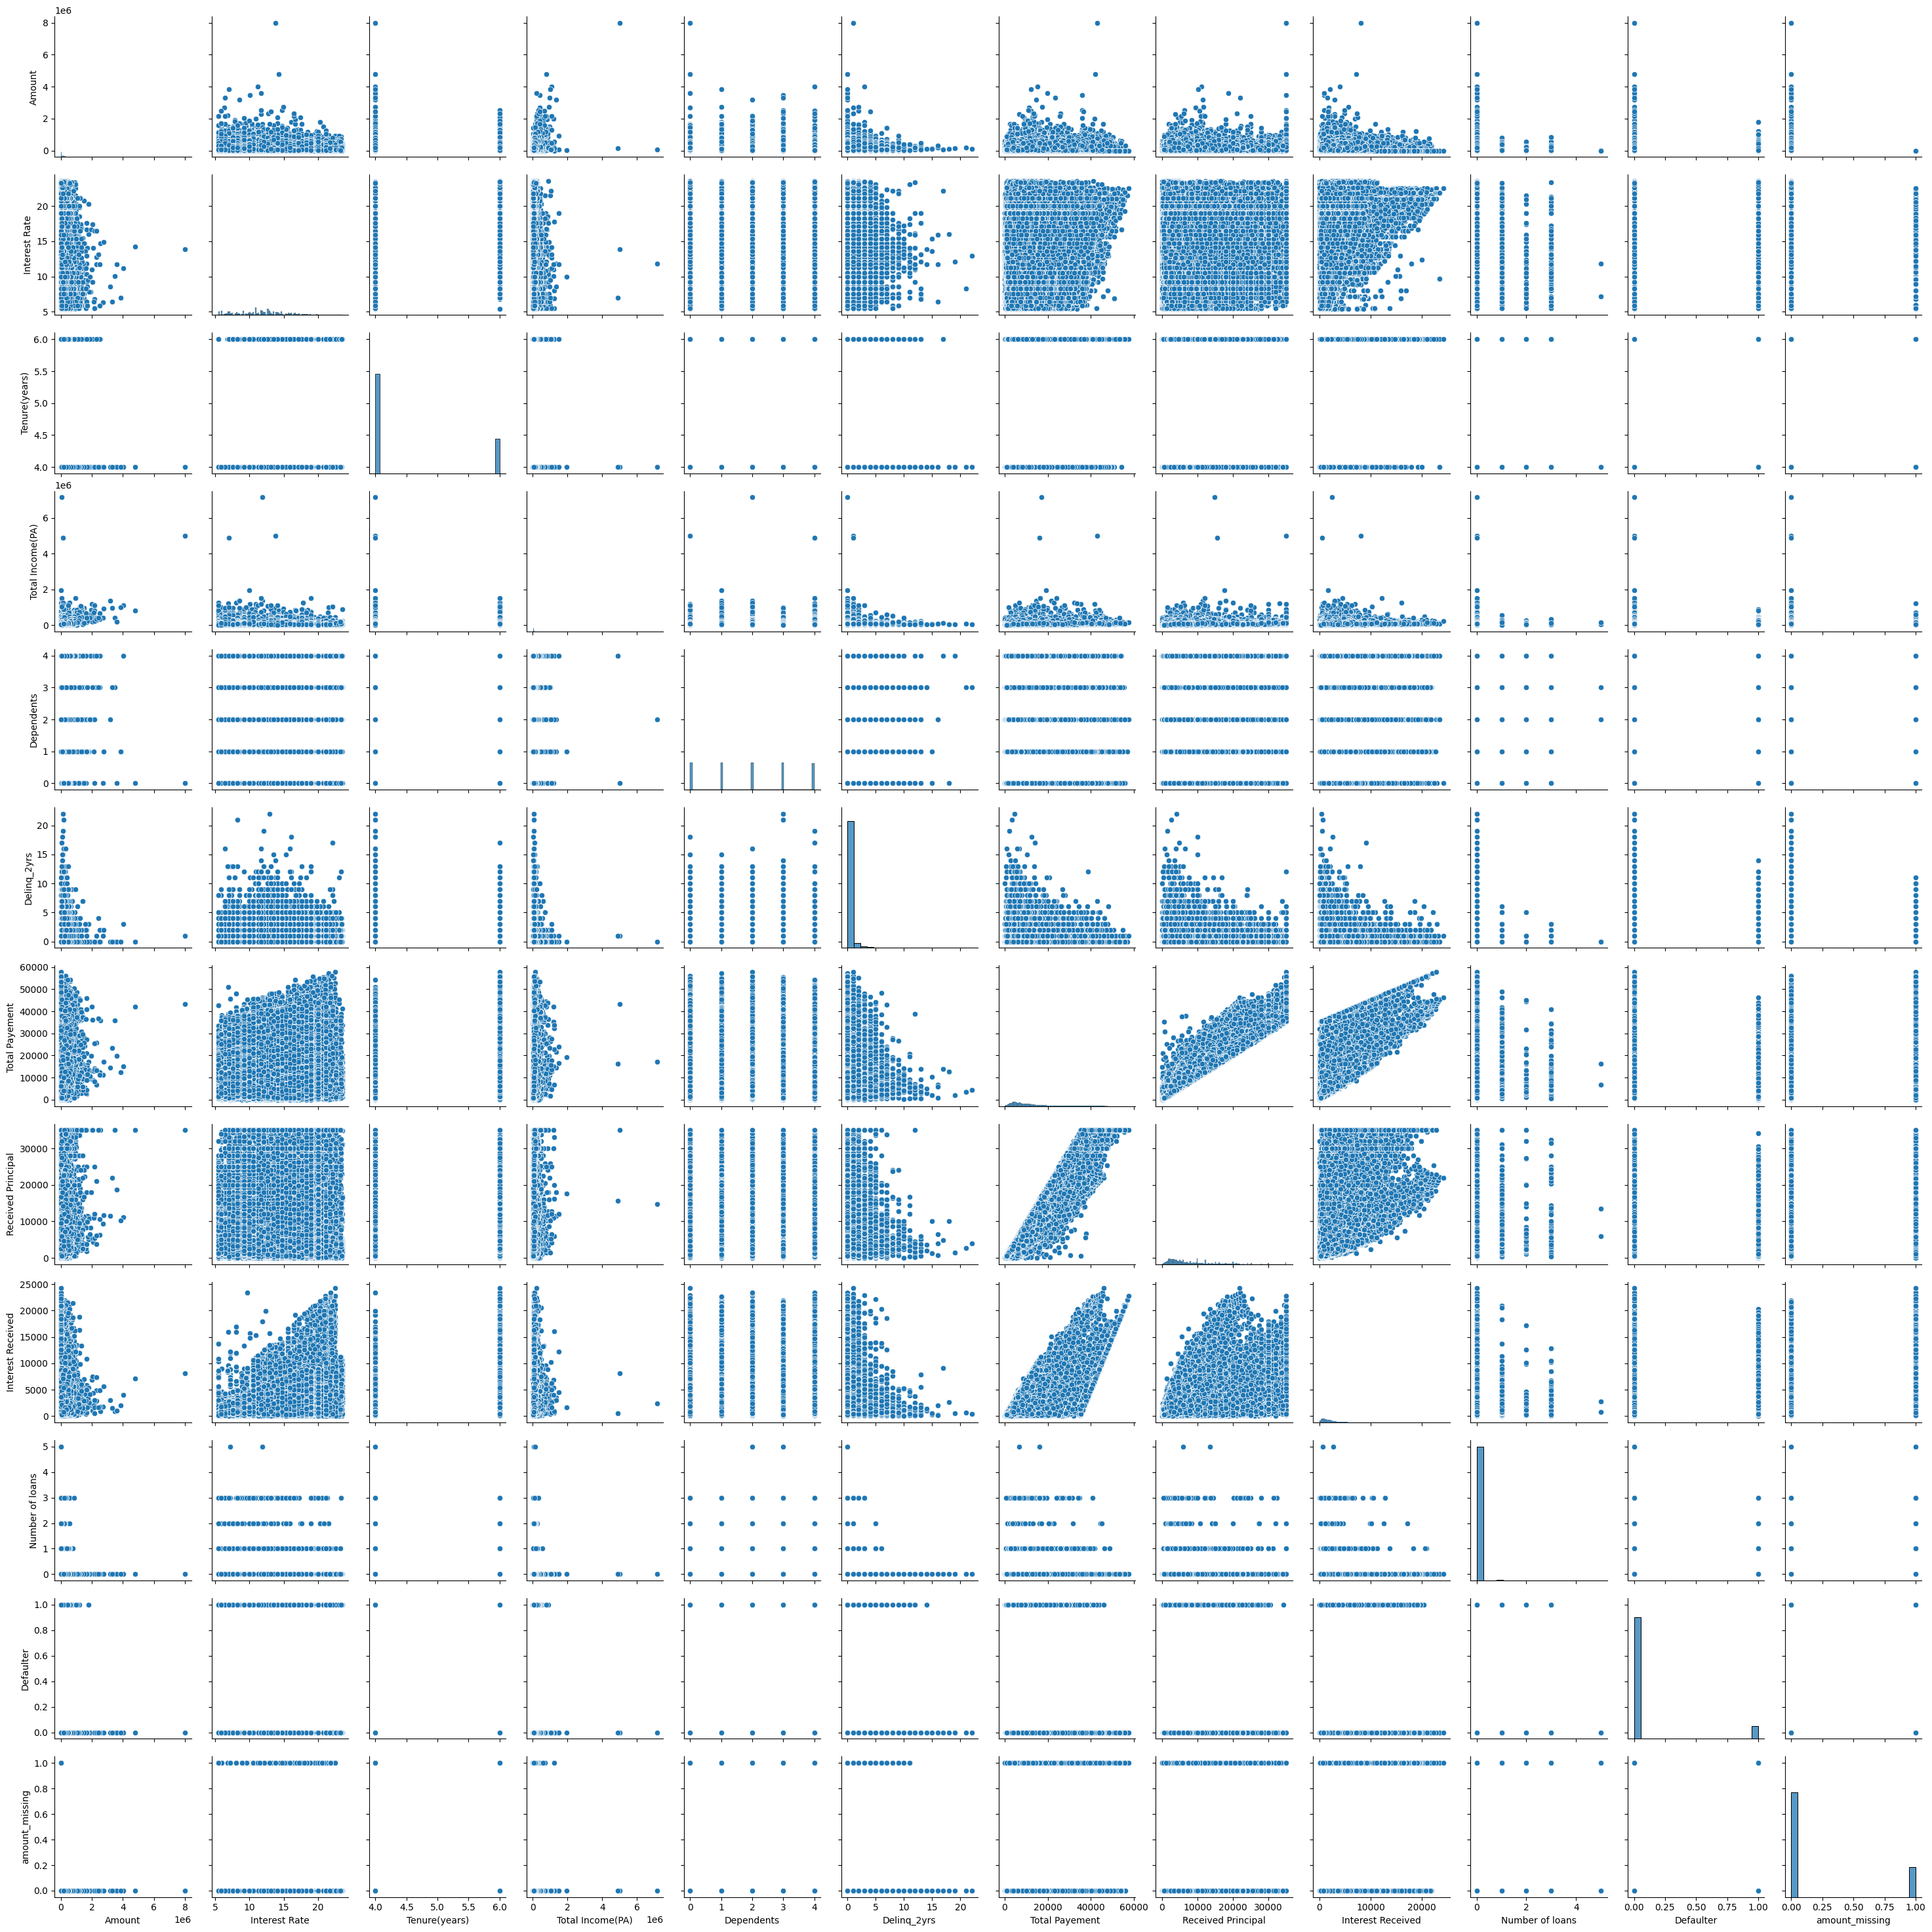

In [ ]:
# Let's plot all interaction scatter plots using seaborn
def plot_pairwise_scatter(df):
    # Get the list of numeric features
    features = df.select_dtypes(include='number').columns

    # Create the pairwise scatter plots using Seaborn
    sns.pairplot(df[features])

# Call the function to plot pairwise scatter plots
plot_pairwise_scatter(df)



One can use scatterplots to confirm multicollinearity between two variables as it helps to visualize correlations between variables. Overall, when there multicollinearity, the concept of trust in the final model loses value as change in one variable will not only impact the target variable but also impact other feature variables. This makes measuring variable impact difficult.

### **One Hot Encoding of Categorical Features and Ordinal Encoding of Ordinal Features**

Categorical variables refer to those variables that represent discrete categories or labels, such as gender (male/female), marital status (single/married/divorced), or product types (A/B/C). These do not have a specific numerical order or hierarchy.

On the other hand, ordinal variables are also discrete categories, but they have a sense of hierarchy to them. Examples may include variables such as education level, employment status and customer satisfaction rating.

### **Categorical Hot-Encoding**

In [ ]:
# Add all categorical features for categorical one-hot encoding in categorical_features array
data = df
categorical_features= ["Gender", "Married", "Home", "Social Profile", "Loan Category", "Employmet type","Is_verified", ]

# Perform one-hot encoding using pandas get_dummies() function
encoded_data = pd.get_dummies(data, columns=categorical_features)

### **Ordinal Encoding**

In [ ]:
encoded_data

,Amount,Interest Rate,Tenure(years),Tier of Employment,Work Experience,Total Income(PA),Dependents,Delinq_2yrs,Total Payement,Received Principal,...,Loan Category_Home,Loan Category_Medical,Loan Category_Other,Employmet type_Salaried,Employmet type_Self - Employeed,Employmet type_missing,Is_verified_Not Verified,Is_verified_Source Verified,Is_verified_Verified,Is_verified_missing
0,55884.0,11.84,6,B,1-2,125000.0,4,0,1824.150000,971.46,...,False,False,False,True,False,False,False,False,False,True
1,55511.0,16.94,4,D,10+,61000.0,1,0,22912.532998,18000.00,...,False,False,False,False,True,False,False,True,False,False
2,12289.0,11.84,6,Z,5-10,100000.0,3,0,7800.440000,4489.76,...,False,False,False,False,False,True,False,False,False,True
3,29324.0,14.71,4,Z,2-3,30000.0,1,0,6672.050000,5212.29,...,False,False,False,False,False,True,False,False,False,True
4,30252.0,14.71,4,Z,10+,65000.0,3,0,11793.001345,10000.00,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143722,287564.0,12.06,6,Z,0,100000.0,2,1,12842.400000,7193.83,...,False,False,False,False,False,True,False,True,False,False
143723,49612.0,14.10,4,Z,0,27000.0,3,0,839.200000,581.67,...,False,False,True,False,False,True,False,True,False,False
143724,13632.0,18.96,6,Z,0,53000.0,2,0,6085.800000,2434.49,...,False,False,False,False,False,True,False,False,False,True
143725,186923.0,8.28,4,Z,0,75400.0,0,0,4080.640000,3286.82,...,True,False,False,False,False,True,False,True,False,False


In [ ]:
print(encoded_data['Work Experience'].unique())

['1-2' '10+' '5-10' '2-3' '3-5' 0 '<1']


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoded_data['Work Experience'] = encoded_data['Work Experience'].astype(str)

# Define the ordinal categorical features array
ordinal_features = ["Tier of Employment", "Work Experience"]
# Create function
def perform_ordinal_encoding(data, ordinal_features, custom_mapping):

    # Perform ordinal encoding using OrdinalEncoder with the custom mapping
    encoder = OrdinalEncoder(categories=custom_mapping)
    data[ordinal_features] = encoder.fit_transform(data[ordinal_features])

    # Return the encoded DataFrame
    return data

# Define the pandas DataFrame for encoding
data = encoded_data

# Create a custom mapping of categories to numerical labels
tier_employment_order= list(encoded_data["Tier of Employment"].unique())
tier_employment_order.sort()

work_experience_order= [ '0', '<1', '1-2', '2-3', '3-5', '5-10','10+']

custom_mapping = [tier_employment_order, work_experience_order]

# Call the function to perform ordinal encoding
data = perform_ordinal_encoding(data, ordinal_features, custom_mapping)

In [ ]:
data

,Amount,Interest Rate,Tenure(years),Tier of Employment,Work Experience,Total Income(PA),Dependents,Delinq_2yrs,Total Payement,Received Principal,...,Loan Category_Home,Loan Category_Medical,Loan Category_Other,Employmet type_Salaried,Employmet type_Self - Employeed,Employmet type_missing,Is_verified_Not Verified,Is_verified_Source Verified,Is_verified_Verified,Is_verified_missing
0,55884.0,11.84,6,1.0,2.0,125000.0,4,0,1824.150000,971.46,...,False,False,False,True,False,False,False,False,False,True
1,55511.0,16.94,4,3.0,6.0,61000.0,1,0,22912.532998,18000.00,...,False,False,False,False,True,False,False,True,False,False
2,12289.0,11.84,6,7.0,5.0,100000.0,3,0,7800.440000,4489.76,...,False,False,False,False,False,True,False,False,False,True
3,29324.0,14.71,4,7.0,3.0,30000.0,1,0,6672.050000,5212.29,...,False,False,False,False,False,True,False,False,False,True
4,30252.0,14.71,4,7.0,6.0,65000.0,3,0,11793.001345,10000.00,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143722,287564.0,12.06,6,7.0,0.0,100000.0,2,1,12842.400000,7193.83,...,False,False,False,False,False,True,False,True,False,False
143723,49612.0,14.10,4,7.0,0.0,27000.0,3,0,839.200000,581.67,...,False,False,True,False,False,True,False,True,False,False
143724,13632.0,18.96,6,7.0,0.0,53000.0,2,0,6085.800000,2434.49,...,False,False,False,False,False,True,False,False,False,True
143725,186923.0,8.28,4,7.0,0.0,75400.0,0,0,4080.640000,3286.82,...,True,False,False,False,False,True,False,True,False,False


There is one more data preprocessing that needs to be done. Right now in the data, the Close to 90 percent of the data represents people that defaults on their loan. The non-defaulters are underrepresented in this data and this must be balanced. Otherwise the classification model that would be created would be a biased one. It would predict loan default 90 percent of the time even when the variables would say otherwise.

In [ ]:
import plotly.express as px

fig = px.histogram(df, x=df.Defaulter)
fig.show()

In [ ]:
# pip install --user --upgrade scikit-learn imbalanced-learn

In [ ]:
#  Fix imbalance in data target using oversampling.
from imblearn.over_sampling import RandomOverSampler

def fix_imbalance_using_oversampling(dataframe, target_column):

  # Separate the features and the target variable
  X = dataframe.drop(target_column, axis=1)
  y = dataframe[target_column]

  # Apply random oversampling using RandomOverSampler
  oversampler = RandomOverSampler(random_state=42)
  X, y = oversampler.fit_resample(X, y)

  return X, y

# Specify the name of the target variable column
target_column="Defaulter"

X, y= fix_imbalance_using_oversampling(data, target_column)



## **Split Data into training, validation, and testing datasets**

In [ ]:
from sklearn.model_selection import train_test_split

#The test_size parameter is set to 0.2, indicating that 20% of the data will be allocated to the testing set, while the remaining 80% will be used for training.
#The random_state parameter is set to 42 to ensure reproducibility of the split, meaning that the same random split will be obtained each time the code is executed.
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# val_x, test_x, val_y, test_y = train_test_split(test_x, test_xy, test_size=0.5, random_state=42)


## **Model Training: Xgboost**

### **Import packages**

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time
from hyperopt import fmin, tpe, hp, STATUS_OK
from hyperopt.pyll import scope
import neptune
from neptune.integrations.xgboost import NeptuneCallback


import pickle
from sklearn.metrics import classification_report, confusion_matrix

For hyperparameter tuning - to find the combination of hyperparameters that produces the xgboost model of best fit, One can deploy hyperopt to find the hyperparameters that best fits the model.

run = neptune.init_run(project='akisanya/credit-default')  CRED

Also the neptune library has functions that can help to document the xgboost model as it progresses

In [ ]:
pip install neptune

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import neptune

run = neptune.init_run(
    project="akisanya/credit-default",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI4YzIwNzg0OS04NmJkLTQyNzItODMwNS1kMDNjNzNlZjYxMzUifQ==",
)  # your credentials

# Creating a NeptuneCallback object to integrate Neptune with XGBoost.
neptune_callback = NeptuneCallback(run=run, log_tree=[0, 1, 2, 3])


[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/akisanya/credit-default/e/CRED-2


In [ ]:
# XGBoost hyperparameters
# Define search space for hyperparameter tuning of XGBoost model.
search_space = {
    'learning_rate': hp.loguniform('learning_rate', -7, 0),
    'max_depth': scope.int(hp.uniform('max_depth', 1, 100)),
    'min_child_weight': hp.loguniform('min_child_weight', -2, 3),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'gamma': hp.loguniform('gamma', -10, 10),
    'alpha': hp.loguniform('alpha', -10, 10),
    'lambda': hp.loguniform('lambda', -10, 10),
    'objective': 'binary:logistic',
    'eval_metric': 'error',
    'seed': 123,
}
train_x=train_x
train_y=train_y
test_x=test_x
test_y=test_y

import xgboost as xgb
#Defining a function named 'train_model' that takes 'params' as input.
def train_model_xgboost(params, neptune_callback, train_x, train_y, test_x, test_y):
    start_time = time.time()

    model = xgb.XGBClassifier(params=params, num_boost_round=5000, verbose_eval=False)

    run_time = time.time() - start_time

    model.fit(train_x, train_y)

    predictions_test = model.predict(test_x)
    mae = mean_absolute_error(test_y, predictions_test)

    return {'status': STATUS_OK, 'loss': mae}

# Finding the best hyperparameters using Hyperopt's fmin function.
best_params = fmin(
    fn=lambda params: train_model_xgboost(params, neptune_callback, train_x, train_y, test_x, test_y),
    space=search_space,
    algo=tpe.suggest,
    max_evals=15,
    rstate=np.random.default_rng(123)
)
run.stop()

# Let's print the params
print(best_params)


100%|██████████| 15/15 [00:22<00:00,  1.49s/trial, best loss: 0.037810448735173315]
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] All 0 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/akisanya/credit-default/e/CRED-2/metadata
{'alpha': 10097.8429974375, 'colsample_bytree': 0.9941458252246209, 'gamma': 4995.254471659089, 'lambda': 6.390134508060656e-05, 'learning_rate': 0.09100767117912448, 'max_depth': 29.65059937692005, 'min_child_weight': 0.1765314436877681, 'subsample': 0.6246406667012787}


In [ ]:
# Access the best hyperparameters
best_hyperparams = {k: best_params[k] for k in best_params}

# Train the final XGBoost model with the best hyperparameters
final_model = xgb.XGBClassifier(
    max_depth=int(best_hyperparams['max_depth']),
    learning_rate=best_hyperparams['learning_rate'],
    gamma=best_hyperparams['gamma'],
    subsample=best_hyperparams['subsample'],
    colsample_bytree=best_hyperparams['colsample_bytree'],
    random_state=42,
    tree_method='hist',enable_categorical= True,  # Use GPU for faster training (if available)
)

final_model.fit(train_x, train_y)  # Train the final model on the entire dataset

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9941458252246209, device=None,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, feature_types=None, gamma=4995.254471659089,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.09100767117912448,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=29, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
### **Model validation**

In [ ]:
# `test_x` contains the test feature data
# `test_y` contains the test target labels
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test data
y_pred = final_model.predict(test_x)

# Print classification metrics
print("Classification Report:")
print(classification_report(test_y, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(test_y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79     25937
           1       0.80      0.77      0.78     26165

    accuracy                           0.79     52102
   macro avg       0.79      0.79      0.79     52102
weighted avg       0.79      0.79      0.79     52102

Confusion Matrix:
[[20936  5001]
 [ 6117 20048]]


#### **Save best fit model**

For model reusability and scalability, it is best practice to save the model and reuse it whenever it is needed.

In [ ]:
# Save the model
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

# Read the testing data to a file
with open('testing_data.pkl', 'wb') as file:
    pickle.dump([test_x, test_y], file)

with open('training_data.pkl', 'wb') as file:
    pickle.dump([train_x, train_y], file)

## **Model Training: RandomForest**

#### **Random Forest Grid Search**

In [ ]:
# Define your parameter grid
param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    }

def random_forest_classifier_grid_search(param_grid, x_train, y_train):


    # Create a random forest classifier
    rf = RandomForestClassifier()

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(rf, param_grid, cv=2, scoring='accuracy')
    grid_search.fit(x_train, y_train)

    # Print the best parameters found
    return grid_search.best_params_


best_parameters=random_forest_classifier_grid_search(param_grid, train_x, train_y)
best_parameters

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Access the best hyperparameters
best_hyperparams = {k: best_parameters[k] for k in best_parameters}

# Train the randomforest model with the best hyperparameters
final_model1 = RandomForestClassifier(
    max_depth=best_hyperparams['max_depth'],
    min_samples_split=best_hyperparams['min_samples_split'],
    n_estimators=best_hyperparams['n_estimators'],
     # Use GPU for faster training (if available)
)

final_model1.fit(train_x, train_y)  # Train the final model on the entire dataset


# Assuming `test_x` contains your test feature data
# Assuming `test_y` contains your test target labels


# Make predictions on the test data
y_pred = final_model1.predict(test_x)

# Print classification metrics
print("Classification Report:")
print(classification_report(test_y, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(test_y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     25937
           1       0.99      1.00      1.00     26165

    accuracy                           1.00     52102
   macro avg       1.00      1.00      1.00     52102
weighted avg       1.00      1.00      1.00     52102

Confusion Matrix:
[[25772   165]
 [    0 26165]]


In [ ]:
# Save the randomForest model
with open('RandomForest_model.pkl', 'wb') as file:
    pickle.dump(final_model1, file)

### **Evaluating Model Performance**

In [ ]:
!pip install shap
!pip install --user deepchecks alibi alibi[tensorflow]

In [ ]:
import sklearn
from sklearn.metrics import classification_report, roc_auc_score


In [ ]:
pip install shap==0.41.0

  Using cached shap-0.41.0.tar.gz (380 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Obtaining dependency information for slicer==0.0.7 from https://files.pythonhosted.org/packages/78/c2/b3f55dfdb8af9812fdb9baf70cacf3b9e82e505b2bd4324d588888b81202/slicer-0.0.7-py3-none-any.whl.metadata
  Using cached slicer-0.0.7-py3-none-any.whl.metadata (3.7 kB)
Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
Failed to build shap
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Building wheel for shap (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [119 lines of output]
      The nvcc binary could not be located in your $PATH. Either  add it to your path, or set $CUDAHOME to enable CUDA
      Error building cuda module: TypeError('cannot unpack non-iterable NoneType object')
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-311
      creating build\lib.win-amd64-cpython-311\shap
      copying shap\datasets.py -> build\lib.win-amd64-cpython-311\shap
      copying shap\links.py -> build\lib.win-amd64-cpython-311\shap
      copying shap\_explanation.py -> build\lib.win-amd64-cpython-311\shap
      copying shap\_serializable.py -> build\lib.win-amd64-cpython-311\shap
      copying shap\__init__.py -> build\lib.win-amd64-cpython-311\shap
      creating build\lib.win-amd64-cpython-311\shap\explainers
      copying shap\ex

In [ ]:
# Load the saved model for post-processes
xg_path = "C:/Users/Acer1/lab_pyspark_1/loan_prediction/xgboost_model.pkl"

# load the model from the file
final_model = pickle.load(open(xg_path, 'rb'))

In [ ]:
# Save the testing data to a file

test_path = "C:/Users/Acer1/lab_pyspark_1/loan_prediction/testing_data.pkl"

with open(test_path, 'rb') as file:
    test_X, test_y = pickle.load(file)


In [ ]:
test_X

,Amount,Interest Rate,Tenure(years),Tier of Employment,Work Experience,Total Income(PA),Dependents,Delinq_2yrs,Total Payement,Received Principal,...,Loan Category_Home,Loan Category_Medical,Loan Category_Other,Employmet type_Salaried,Employmet type_Self - Employeed,Employmet type_missing,Is_verified_Not Verified,Is_verified_Source Verified,Is_verified_Verified,Is_verified_missing
238444,-1000.0,13.23,4,2.0,0.0,55000.0,3,3,18898.080000,11993.98,...,False,False,False,True,False,False,True,False,False,False
170163,41740.0,16.70,4,7.0,1.0,75000.0,0,0,18913.550000,12073.14,...,False,False,False,False,False,True,False,True,False,False
40294,-1000.0,10.95,4,1.0,0.0,65000.0,0,0,3321.100000,2420.96,...,False,False,False,False,True,False,True,False,False,False
88429,26279.0,5.86,4,7.0,0.0,64683.0,0,0,5278.640000,4835.37,...,False,False,False,False,False,True,False,False,True,False
78470,36031.0,14.08,6,7.0,0.0,62232.0,4,0,4673.780000,2343.57,...,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136932,69496.0,8.28,4,1.0,0.0,65000.0,1,0,22950.480000,21000.00,...,False,False,False,True,False,False,False,False,True,False
29217,26987.0,16.70,4,3.0,5.0,34940.0,2,0,13099.776262,10000.00,...,False,False,False,True,False,False,False,False,True,False
237470,97721.0,14.27,4,2.0,5.0,40000.0,1,0,5958.680000,2762.54,...,False,False,False,False,True,False,True,False,False,False
27733,53461.0,11.84,4,1.0,0.0,48000.0,2,0,23995.040000,12902.29,...,False,False,False,True,False,False,True,False,False,False


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


# Make predictions on the test data
y_pred = final_model.predict(test_x)

# Print classification metrics
print("Classification Report:")
print(classification_report(test_y, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(test_y, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79     25937
           1       0.80      0.77      0.78     26165

    accuracy                           0.79     52102
   macro avg       0.79      0.79      0.79     52102
weighted avg       0.79      0.79      0.79     52102

Confusion Matrix:
[[20936  5001]
 [ 6117 20048]]


### **Model Performance Explanation**

The first array in the confusion matrix contain values for the True Positives(TP) and False Positives(FP), respectively while the second array consists False Negatives(FN) and True Negatives(TN) respectively.

- True Positives: These are predictions classified as Defaults when the actual observation is also a Default

- False Positives: These are predictions classified as Defaults when the actual observation was classified as Non-Default.

- False Negatives: These are predictions classified as Non-Defaults when the actual observation was classified as a Default.

- True Negatives: These are predictions classified as Non-Defaults when the actual observation is also classified as a Non-Default.

### **Implications for Businesses and stakeholders**

Considering hypothetical cost values for False Negatives and False Positive scenarios,

- False Positives - Let's say that the average amount that would be lost when the model predicts a Defaulter and they are actual Non-Defaulters or in other words the interests that would have been accrued for every false postive prediction is valued at 10,000usd

- False Negatives - The average amount that it would cost when loans are granted to actual Defaulters when the model predicted them as Non-Defaulters is valued at 50,000usd

Using these values, the total cost of errors can be calculated as:

Total Cost = (FP * Cost of FP) + (FN * Cost of FN)

Total Cost = (5029 * 10000) + (6100 * 50000)

Total Cost = $355.29 million


The total cost of errors depends on the specific cost values assigned to FPs and FNs and can help assess the financial impact of misclassifications in the loan default use case. By adjusting the cost values, organisations can prioritize minimizing the type of error that incurs higher financial losses and optimize their model accordingly.

### **Deepchecks to find segments in the data ML Model does not work**

In [ ]:
def filter_test_data_based_actual_prediction(test_x, test_y,y_pred, actual=1, prediction=0  ):

  ## Filter False negatives

  # Assuming you have a DataFrame called df and a numpy array called y_pred

  # Convert the numpy array to a pandas Series
  Predictions = pd.Series(y_pred, name='Predictions')

  # Merge the Series with the DataFrame
  merged_df = pd.concat([test_y, Predictions], axis=1)


  filtered_df = merged_df[(merged_df['Defaulter'] == actual) & (merged_df['Predictions'] == prediction)]


  # Assuming you have the 'test_x' DataFrame and 'filtered_df' DataFrame already defined

  # Get the index of the filtered_df
  filtered_index = filtered_df.index

  # Filter the test_x DataFrame based on the same index
  filtered_test_x = test_x.loc[filtered_index]

  # Concatenate test_x and filtered_df along the columns axis
  concatenated_df = pd.concat([filtered_test_x, filtered_df], axis=1)

  # Assuming you have a DataFrame called 'data' and want to extract the column 'column_name'

  # Split the data into features (X) and labels (y)
  test_x_FN = concatenated_df.drop(['Predictions', 'Defaulter'], axis=1)  # Features (all columns except 'column_name')
  test_y_FN = concatenated_df['Defaulter']  # Label column

  return test_x_FN, test_y_FN

test_x_FP, test_y_FP= filter_test_data_based_actual_prediction(test_x, test_y, y_pred, actual=0, prediction=1 )


In [ ]:
#The check is designed to help you easily identify the model’s weakest segments in the data provided.
#In addition, it enables to provide a sublist of the Dataset’s features, thus limiting the check to search in interesting subspaces.
from deepchecks.tabular import Dataset
from deepchecks.tabular.checks import WeakSegmentsPerformance


# Create a DeepChecks Dataset from the test data
dataset = Dataset(test_x_FP, test_y_FP)
WeakSegmentsPerformance().run(dataset, final_model)

deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 35 categorical features were inferred.: Tenure(years), Tier of Employment, Work Experience, Dependents, Delinq_2yrs, Number of loans, amount_missing... For full list use dataset.cat_features


From this chart, one can observe that the model tends to generate false positives when the interest rate is between 5.42 and 17.81. As a data scientist, one should present this findings to stakeholders and collectiively make decisions as to how the model can be improved

In [ ]:
test_x_FN, test_y_FN= filter_test_data_based_actual_prediction(test_x, test_y, y_pred, actual=1, prediction=0 )

# Create a DeepChecks Dataset from the test data
dataset = Dataset(test_x_FN, test_y_FN)
WeakSegmentsPerformance().run(dataset, final_model)

deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 35 categorical features were inferred.: Tenure(years), Tier of Employment, Work Experience, Dependents, Delinq_2yrs, Number of loans, amount_missing... For full list use dataset.cat_features


From the above chart, it can be observed that occurences of false negatives from the model's predictions occured when the interest rate falls between 5.45 and 11.39, the amount is above 241.15k, and also when the Received Principal falls between 9.52k and 30.54k.

These graphs gives substantial information on the level of importance of different features to the model. Understanding feature importance aids in selecting the most relevant and informative features. Feature importance provides insights into the underlying factors driving the model's predictions. As a data scientist, I ca explain to stakeholders the rationale behind the model's decision-making process by highlighting the key features that contribute significantly to the creditworthiness assessment.

To understand how each feature impacts the output of thet model, one can plot the SHAP value of the false positives and the False Negatives to see the mose important features and how they impact the output of the model.

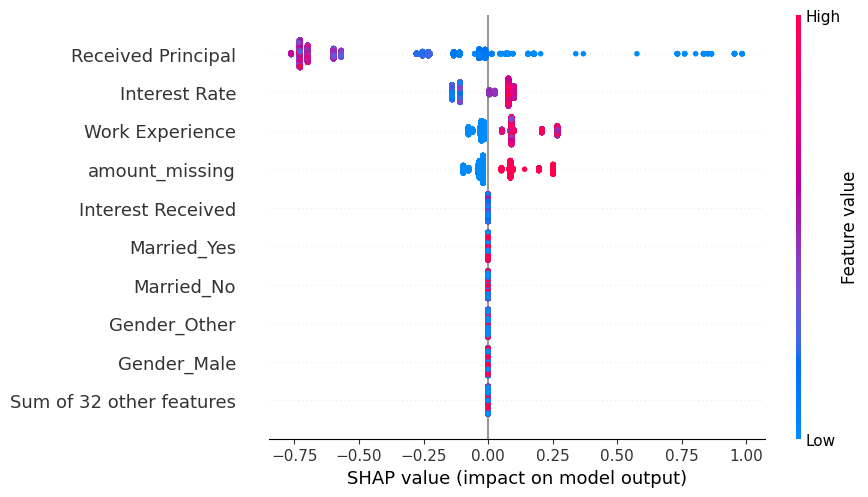

In [ ]:
import shap

# Create a SHAP TreeExplainer
explainer = shap.TreeExplainer(final_model)

# Calculate SHAP values for the testing data

dmatrix_test = xgb.DMatrix(test_x_FP, enable_categorical=True) # Optional. Use if you have categorical data in processed data

shap_values = explainer(test_x_FP)

# summarize the effects of all the features
shap.plots.beeswarm(shap_values)
# shap.plots.bar(shap_values)

Let's take the top-most feature and expand it to see how it really impacts the model

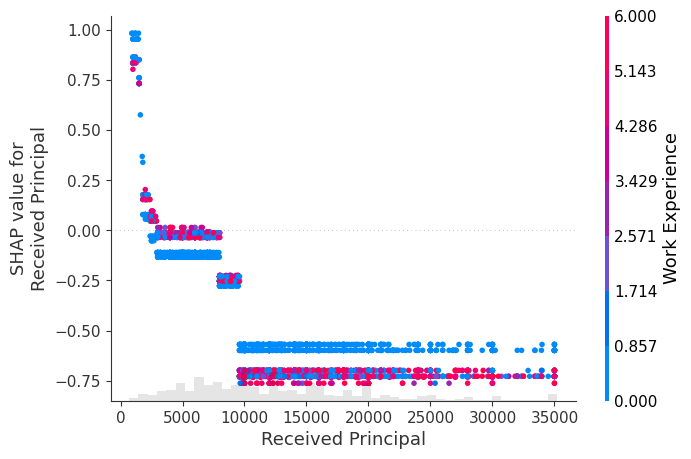

In [ ]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"Received Principal"], color=shap_values)

From here it can be observed that the SHAP values of the False Positive data increases when the Received Principal is significantly below 10,000. In other words, the model is most likely to generate a false positive prediction when the value of the received principal is below 10,000.

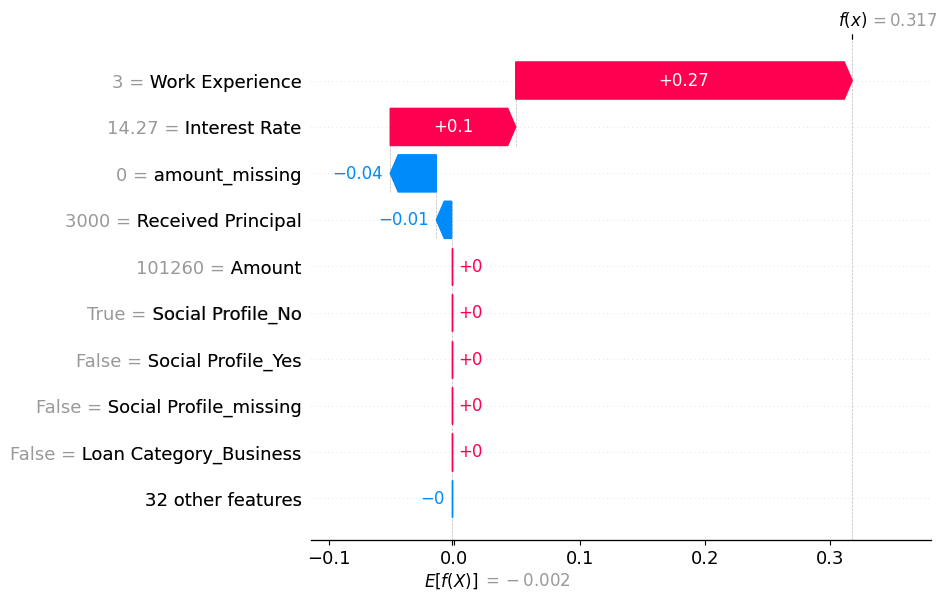

In [ ]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

In [ ]:
import pandas as pd
from alibi.explainers import AnchorTabular


"""Initialize and train the anchor model"""
predict_fn = lambda x: final_model.predict_proba(x)
explainer = AnchorTabular(predict_fn, feature_names=train_x.columns)
# Fit the explainer with reference data
explainer.fit(train_x.values)

"""Find Anchor of customer at index 0"""
idx = 0 # record we would like to explain using anchors
class_names = ["No Default","Default"]

print('Prediction: ', class_names[explainer.predictor(train_x[idx:idx+1].values)[0]])

explanation = explainer.explain(train_x[idx:idx+1].values, threshold=0.95)
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Prediction:  Default
Anchor: Received Principal <= 2038.73
Precision: 0.95
Coverage: 0.26


This implies that the model predicted this particular observation as a default because the received principal was less than or equal to 2038.73 and the Precision of this prediction was 95%. Anchors are very good at model explanations because they help to track the key variables behind model decisions. Let's look at another prediction

In [ ]:
"""case 1 : actual=0 and prediction=0"""

test_x_TP, test_y_TP= filter_test_data_based_actual_prediction(test_x, test_y, y_pred, actual=0, prediction=0 )

idx = 2 # record we would like to explain using anchors
class_names = ["No Default","Default"]

print('Prediction: ', class_names[explainer.predictor(test_x_TP[idx:idx+1].values)[0]])

explanation = explainer.explain(test_x_TP[idx:idx+1].values, threshold=0.95)
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Prediction:  No Default
Anchor: Received Principal > 8675.00
Precision: 0.97
Coverage: 0.25


This implies that this prediction was a "No Default" because the Received Principal variable was greater than 8675 and the precision of this prediction was 97%

In [ ]:
"""case 2 : Loan denied: actual=1 and prediction=1"""

test_x_TN, test_y_TN= filter_test_data_based_actual_prediction(test_x, test_y, y_pred, actual=1, prediction=1 )

idx = 2 # record we would like to explain using anchors
class_names = ["No Default","Default"]

print('Prediction: ', class_names[explainer.predictor(test_x_TN[idx:idx+1].values)[0]])

explanation = explainer.explain(test_x_TN[idx:idx+1].values, threshold=0.95)
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Prediction:  Default
Anchor: Work Experience > 0.00 AND Received Principal <= 8675.00
Precision: 0.98
Coverage: 0.13
